# 分组计算
* Split
* Aggregate


In [15]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:,.1f}'.format)


## Split, Aggregate, Combine

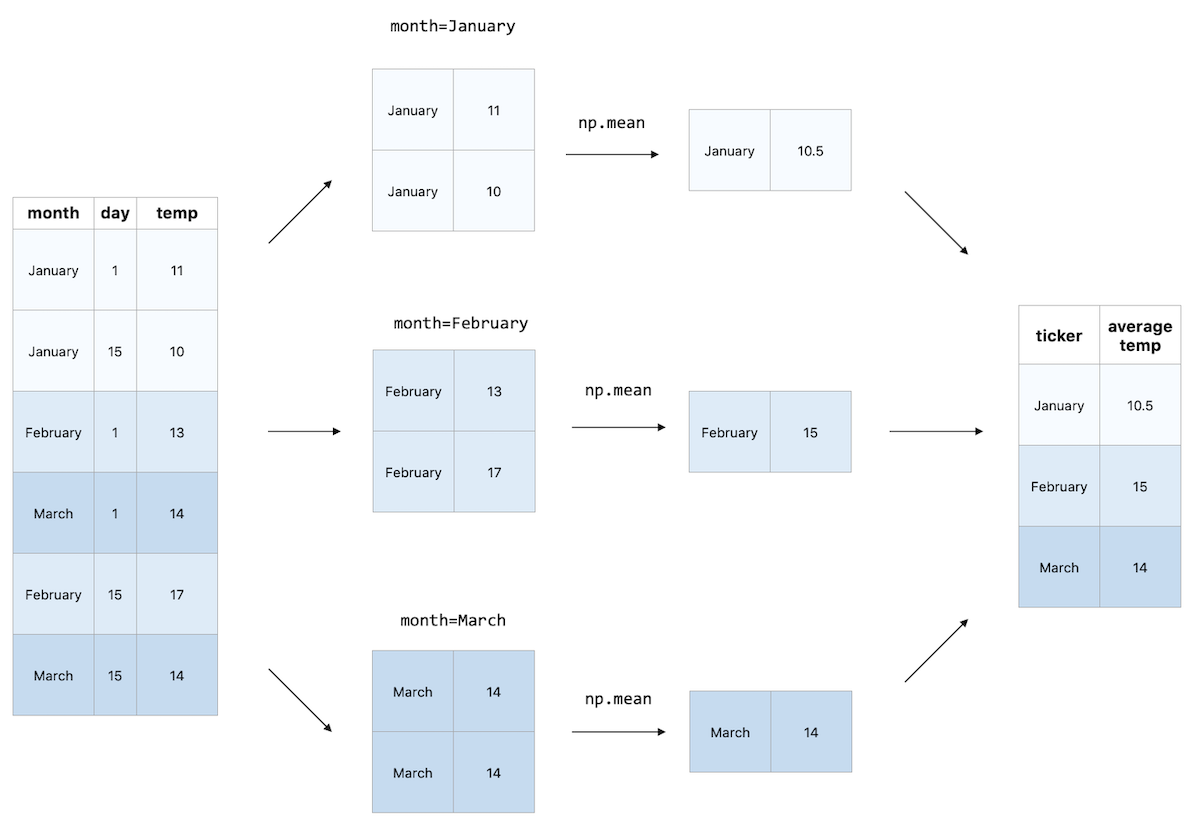

In [6]:
image('split-apply-combine.png')

In [17]:
import glob
glob.glob('./data/*')

['./data\\df.csv',
 './data\\score.xlsx',
 './data\\stock.csv',
 './data\\weather-6m.csv']

In [19]:
dat=pd.read_csv('./data/weather-6m.csv')

In [20]:
dat.head()

year  month  day  hour  air_temp  dew_point  wind_speed
0  2009      1    1     1    -133.0     -167.0        15.0
1  2009      1    1     2    -133.0     -161.0        26.0
2  2009      1    1     3    -122.0     -156.0         0.0
3  2009      1    1     4    -117.0     -150.0         0.0
4  2009      1    1     5    -111.0     -150.0        15.0

In [21]:
dat['year'].unique()

array([2009], dtype=int64)

In [22]:
dat['month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [23]:
dat.dtypes

year            int64
month           int64
day             int64
hour            int64
air_temp      float64
dew_point     float64
wind_speed    float64
dtype: object

In [24]:
dat.shape

(4340, 7)

In [25]:
dat.describe()

year   month     day    hour  air_temp  dew_point  wind_speed
count 4,340.0 4,340.0 4,340.0 4,340.0   4,161.0    4,161.0     4,151.0
mean  2,009.0     3.5    15.6    11.5      47.4       -9.8        43.3
std       0.0     1.7     8.7     6.9     114.0      105.9        24.6
min   2,009.0     1.0     1.0     0.0    -294.0     -328.0         0.0
25%   2,009.0     2.0     8.0     5.8     -33.0      -83.0        26.0
50%   2,009.0     4.0    16.0    12.0      44.0      -11.0        41.0
75%   2,009.0     5.0    23.0    18.0     133.0       72.0        62.0
max   2,009.0     6.0    31.0    23.0     333.0      233.0       165.0

## Split
* 对一个column进行分组
* 对多个column进行分组


### 对一个column进行分组

In [26]:
grp=dat.groupby('month')

In [29]:
for month,month_df in grp:
    print('Month :'+str(month))
    print(month_df.head(10))

Month :1
   year  month  day  hour  air_temp  dew_point  wind_speed
0  2009      1    1     1    -133.0     -167.0        15.0
1  2009      1    1     2    -133.0     -161.0        26.0
2  2009      1    1     3    -122.0     -156.0         0.0
3  2009      1    1     4    -117.0     -150.0         0.0
4  2009      1    1     5    -111.0     -150.0        15.0
5  2009      1    1     6       nan        nan         nan
6  2009      1    1     7     -94.0     -144.0        31.0
7  2009      1    1     8     -89.0     -139.0        31.0
8  2009      1    1     9     -83.0     -139.0        41.0
9  2009      1    1    10     -78.0     -139.0        57.0
Month :2
     year  month  day  hour  air_temp  dew_point  wind_speed
743  2009      2    1     0      28.0      -17.0        82.0
744  2009      2    1     1      28.0      -17.0        82.0
745  2009      2    1     2      33.0      -11.0        93.0
746  2009      2    1     3      28.0      -11.0        77.0
747  2009      2    1     4 

In [30]:
grp.groups.keys()

dict_keys([1, 2, 3, 4, 5, 6])

#### 提取某个group

In [32]:
grp.get_group(6).head(10)

year  month  day  hour  air_temp  dew_point  wind_speed
3623  2009      6    1     0     139.0       17.0        41.0
3624  2009      6    1     1     133.0       28.0        21.0
3625  2009      6    1     2     133.0       22.0        26.0
3626  2009      6    1     3     139.0       17.0        41.0
3627  2009      6    1     4     144.0       17.0        41.0
3628  2009      6    1     5     144.0       28.0        41.0
3629  2009      6    1     6       nan        nan         nan
3630  2009      6    1     7     111.0       72.0        36.0
3631  2009      6    1     8     111.0       83.0         0.0
3632  2009      6    1     9     122.0       94.0        36.0

### 对多个column进行分组

In [38]:
grp2=dat.groupby(['year','month','day'])

In [37]:
for key,dat_df in grp2:
    print('key: '+str(key))
    print(dat_df.head(60))

key: 1
      year  month  day  hour  air_temp  dew_point  wind_speed
0     2009      1    1     1    -133.0     -167.0        15.0
1     2009      1    1     2    -133.0     -161.0        26.0
2     2009      1    1     3    -122.0     -156.0         0.0
3     2009      1    1     4    -117.0     -150.0         0.0
4     2009      1    1     5    -111.0     -150.0        15.0
5     2009      1    1     6       nan        nan         nan
6     2009      1    1     7     -94.0     -144.0        31.0
7     2009      1    1     8     -89.0     -139.0        31.0
8     2009      1    1     9     -83.0     -139.0        41.0
9     2009      1    1    10     -78.0     -139.0        57.0
10    2009      1    1    11     -72.0     -133.0        46.0
11    2009      1    1    12     -72.0     -128.0        41.0
12    2009      1    1    13     -67.0     -122.0        51.0
13    2009      1    1    14     -67.0     -117.0        62.0
14    2009      1    1    15     -56.0     -111.0        57.0
1

key: 30
      year  month  day  hour  air_temp  dew_point  wind_speed
695   2009      1   30     0     -56.0      -89.0        67.0
696   2009      1   30     1     -67.0     -106.0        67.0
697   2009      1   30     2     -83.0     -144.0        62.0
698   2009      1   30     3     -94.0     -150.0        51.0
699   2009      1   30     4    -106.0     -156.0        51.0
700   2009      1   30     5    -117.0     -167.0        51.0
701   2009      1   30     6       nan        nan         nan
702   2009      1   30     7    -117.0     -161.0        41.0
703   2009      1   30     8    -117.0     -167.0        41.0
704   2009      1   30     9    -133.0     -178.0        41.0
705   2009      1   30    10    -133.0     -178.0        41.0
706   2009      1   30    11    -156.0     -189.0        36.0
707   2009      1   30    12    -167.0     -200.0        26.0
708   2009      1   30    13    -167.0     -206.0        41.0
709   2009      1   30    14    -161.0     -206.0        41.0


In [43]:
list(grp2.groups.keys())[3]

(2009, 1, 4)

In [44]:
grp2.get_group((2009, 1, 4))

year  month  day  hour  air_temp  dew_point  wind_speed
71  2009      1    4     0      11.0      -44.0        93.0
72  2009      1    4     1      11.0      -44.0        88.0
73  2009      1    4     2      11.0      -39.0        82.0
74  2009      1    4     3      17.0      -39.0        93.0
75  2009      1    4     4      11.0      -33.0        77.0
76  2009      1    4     5      11.0      -28.0        77.0
77  2009      1    4     6       nan        nan         nan
78  2009      1    4     7      11.0      -17.0        62.0
79  2009      1    4     8      17.0      -11.0        67.0
80  2009      1    4     9      10.0       10.0        36.0
81  2009      1    4    10      11.0        6.0         0.0
82  2009      1    4    11      11.0        6.0         0.0
83  2009      1    4    12       6.0        0.0        15.0
84  2009      1    4    13       6.0        0.0        31.0
85  2009      1    4    14       6.0        0.0        41.0
86  2009      1    4    15      11.0       -6.0        46.0
87  2009      1    4    16      11.0      -11.0        62.0
88  2009      1    4    17       6.0      -17.0        57.0
89  2009      1    4    18       6.0      -22.0        82.0
90  2009      1    4    19      -6.0      -28.0        72.0
91  2009      1    4    20     -22.0      -50.0        72.0
92  2009      1    4    21     -33.0      -67.0        88.0
93  2009      1    4    22     -33.0      -78.0        67.0
94  2009      1    4    23     -50.0     -106.0        67.0

In [ ]:
'day', 2019-01-01

## Aggregation
* 对单一column进行单一操作
* 对单一column进行多个操作
* 对多个column进行单一操作
* 对多个column进行多个操作
* 对多个column进行groupby，对多个column进行多个操作


In [46]:
grp=dat.groupby('month')
grp.mean()

year  day  hour  air_temp  dew_point  wind_speed
month                                                    
1     2,009.0 16.0  11.5    -100.1     -141.1        42.8
2     2,009.0 14.5  11.5     -29.5      -72.5        48.0
3     2,009.0 16.0  11.5      21.0      -34.2        44.7
4     2,009.0 15.5  11.5      70.3        2.7        49.5
5     2,009.0 16.0  11.5     139.8       62.4        42.6
6     2,009.0 15.5  11.5     180.6      122.5        32.7

### 对单一column进行单一操作

In [48]:
grp[['wind_speed']].mean()

wind_speed
month            
1            42.8
2            48.0
3            44.7
4            49.5
5            42.6
6            32.7

In [49]:
grp[['air_temp']].mean()

air_temp
month          
1        -100.1
2         -29.5
3          21.0
4          70.3
5         139.8
6         180.6

In [51]:
grp[['air_temp']].max()

air_temp
month          
1          28.0
2         150.0
3         228.0
4         283.0
5         283.0
6         333.0

In [62]:
pd.DataFrame(grp['air_temp'].nlargest(3)).reset_index().drop(['level_1'],axis=1).set_index('month')

air_temp
month          
1          28.0
1          28.0
1          22.0
2         150.0
2         144.0
2         144.0
3         228.0
3         222.0
3         222.0
4         283.0
4         283.0
4         278.0
5         283.0
5         283.0
5         283.0
6         333.0
6         333.0
6         333.0

### 对单一column进行多个操作

In [63]:
grp['air_temp'].agg(['min','max','mean'])

min   max   mean
month                    
1     -294.0  28.0 -100.1
2     -194.0 150.0  -29.5
3     -133.0 228.0   21.0
4      -28.0 283.0   70.3
5       11.0 283.0  139.8
6       33.0 333.0  180.6

In [64]:
grp['wind_speed'].agg(['max','std','var','median'])

max  std   var  median
month                         
1     118.0 21.4 458.4    41.0
2     129.0 25.0 624.6    46.0
3     149.0 28.3 798.7    41.0
4     134.0 24.8 617.1    46.0
5     165.0 21.9 481.3    41.0
6     124.0 22.2 495.1    31.0

### 对多个column进行单一操作

In [66]:
grp[['wind_speed','air_temp']].mean()

wind_speed  air_temp
month                      
1            42.8    -100.1
2            48.0     -29.5
3            44.7      21.0
4            49.5      70.3
5            42.6     139.8
6            32.7     180.6

In [68]:
grp[['wind_speed','dew_point','air_temp']].std()

wind_speed  dew_point  air_temp
month                                 
1            21.4       68.2      61.6
2            25.0       72.9      67.8
3            28.3       61.3      67.0
4            24.8       61.0      59.6
5            21.9       46.4      51.1
6            22.2       54.6      60.0

### 对多个column进行多个操作

In [76]:
grp.agg({
    'air_temp':'mean',
    'wind_speed':'max',
    'dew_point':'var'}).rename(columns={'air_temp':'mean_air_temp',
                                       'wind_speed':'max_wind_speed',
                                       'dew_point':'var_dew_point'})

mean_air_temp  max_wind_speed  var_dew_point
month                                              
1             -100.1           118.0        4,654.6
2              -29.5           129.0        5,320.5
3               21.0           149.0        3,755.2
4               70.3           134.0        3,721.4
5              139.8           165.0        2,150.2
6              180.6           124.0        2,980.4

In [74]:
df.columns=['mean_air_temp', 'max_wind_speed', 'var_dew_point']
df

mean_air_temp  max_wind_speed  var_dew_point
month                                              
1             -100.1           118.0        4,654.6
2              -29.5           129.0        5,320.5
3               21.0           149.0        3,755.2
4               70.3           134.0        3,721.4
5              139.8           165.0        2,150.2
6              180.6           124.0        2,980.4

In [78]:
df=grp.agg({
    'air_temp':'mean',
    'wind_speed':['max','min']})
df

air_temp wind_speed    
          mean        max min
month                        
1       -100.1      118.0 0.0
2        -29.5      129.0 0.0
3         21.0      149.0 0.0
4         70.3      134.0 0.0
5        139.8      165.0 0.0
6        180.6      124.0 0.0

In [82]:
df.columns=[i[0]+','+i[1] for i in df.columns.ravel()]

In [83]:
df

air_temp,mean  wind_speed,max  wind_speed,min
month                                               
1             -100.1           118.0             0.0
2              -29.5           129.0             0.0
3               21.0           149.0             0.0
4               70.3           134.0             0.0
5              139.8           165.0             0.0
6              180.6           124.0             0.0

### 对多个column进行groupby，对多个column进行多个操作

In [86]:
grp2=dat.groupby(['year','month','day'])

In [89]:
grp2.agg({
    'air_temp':'mean',
    'wind_speed':'max',
    'dew_point':'var'}).rename(columns={'air_temp':'mean_air_temp',
                                       'wind_speed':'max_wind_speed',
                                       'dew_point':'var_dew_point'})

mean_air_temp  max_wind_speed  var_dew_point
year month day                                              
2009 1     1            -69.9            88.0          736.2
           2            -43.6           118.0        1,420.9
           3            -52.7           103.0        2,294.0
           4              1.7            93.0          853.9
           5            -79.0            72.0          212.2
...                       ...             ...            ...
     6     26           243.3            51.0          319.0
           27           209.9            62.0          164.4
           28           230.5           124.0        1,408.5
           29           197.3            98.0          102.0
           30           175.1            67.0           96.4

[181 rows x 3 columns]

In [90]:
grp2.agg({
    'air_temp':'mean',
    'wind_speed':['max','min']})

air_temp wind_speed     
                   mean        max  min
year month day                         
2009 1     1      -69.9       88.0  0.0
           2      -43.6      118.0 21.0
           3      -52.7      103.0  0.0
           4        1.7       93.0  0.0
           5      -79.0       72.0 36.0
...                 ...        ...  ...
     6     26     243.3       51.0  0.0
           27     209.9       62.0  0.0
           28     230.5      124.0 21.0
           29     197.3       98.0 31.0
           30     175.1       67.0 21.0

[181 rows x 3 columns]

### 课后作业

In [108]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', '{:,.1f}'.format)

In [109]:
dat = pd.read_csv('./data/weather-6m.csv')

**Exercise:**

计算每个月 `air_temp` 的平均值

用 describe 描述 air_temp 和 dew_point

只对1月和2月, 计算每小时air_temp 的平均值和std

计算每月air_temp 的分位数[0.2,0.4,0.6,0.8]